In [1]:
import yfinance as yf


In [22]:
stocks = yf.download("MSFT",start='2017-01-01' ,end ='2020-09-20')

[*********************100%***********************]  1 of 1 completed


In [35]:
stocks.to_csv('C:/Users/91875/Desktop/FBprophet/MSstocks.csv')

In [49]:
df =pd.read_csv('MSstocks.csv')

In [50]:
df.head()

,s.no,Date,Open,High,Low,Close,Adj Close,Volume
0,1,03-01-2017,62.790001,62.840000,62.130001,62.580002,58.826855,20694100
1,2,04-01-2017,62.480000,62.750000,62.119999,62.299999,58.563644,21340000
2,3,05-01-2017,62.189999,62.660000,62.029999,62.299999,58.563644,24876000
3,4,06-01-2017,62.299999,63.150002,62.040001,62.840000,59.071262,19922900
4,5,09-01-2017,62.759998,63.080002,62.540001,62.639999,58.883255,20382700


In [51]:
df.tail()

,s.no,Date,Open,High,Low,Close,Adj Close,Volume
930,931,14-09-2020,204.240005,209.199997,204.029999,205.410004,205.410004,30375800
931,932,15-09-2020,208.419998,209.779999,206.929993,208.779999,208.779999,21823900
932,933,16-09-2020,210.619995,210.649994,204.639999,205.050003,205.050003,26328100
933,934,17-09-2020,200.050003,204.330002,199.960007,202.910004,202.910004,34011300
934,935,18-09-2020,202.800003,203.649994,196.250000,200.389999,200.389999,55225300


In [52]:
df.shape

(935, 8)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   s.no       935 non-null    int64  
 1   Date       935 non-null    object 
 2   Open       935 non-null    float64
 3   High       935 non-null    float64
 4   Low        935 non-null    float64
 5   Close      935 non-null    float64
 6   Adj Close  935 non-null    float64
 7   Volume     935 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 58.6+ KB


In [54]:
df.describe()

,s.no,Open,High,Low,Close,Adj Close,Volume
count,935.00000,935.000000,935.000000,935.000000,935.000000,935.000000,9.350000e+02
mean,468.00000,117.319476,118.453380,116.074834,117.336096,114.943228,2.912176e+07
std,270.05555,41.589531,42.213566,40.917158,41.600874,42.629970,1.387291e+07
min,1.00000,62.189999,62.660000,61.950001,62.299999,58.563644,7.425600e+06
25%,234.50000,84.365002,84.910000,83.830002,84.369999,80.883911,2.009830e+07
50%,468.00000,107.959999,108.839996,106.690002,107.680000,104.855316,2.520130e+07
75%,701.50000,140.129997,141.010002,138.625000,139.684998,138.134758,3.333575e+07
max,935.00000,229.270004,232.860001,227.350006,231.649994,231.649994,1.112421e+08


In [55]:
df = df.sort_values('Date')

In [42]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

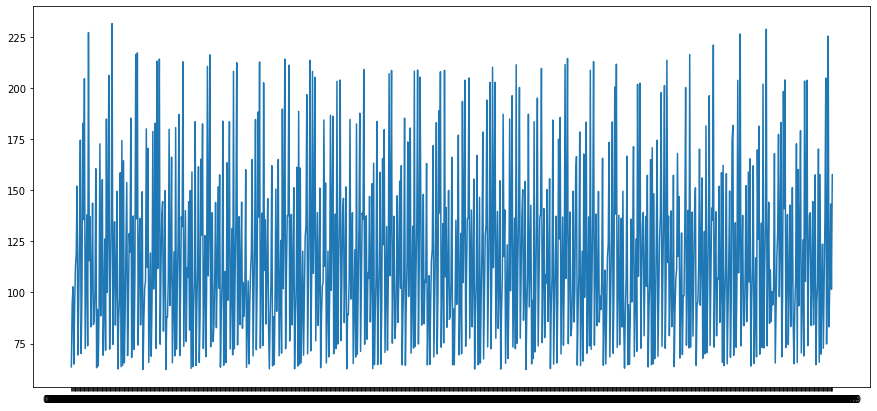

In [57]:
# Plot date and average price
plt.figure(figsize = (15,7))
plt.plot(df['Date'],df['Close'])

<AxesSubplot:xlabel='Close'>

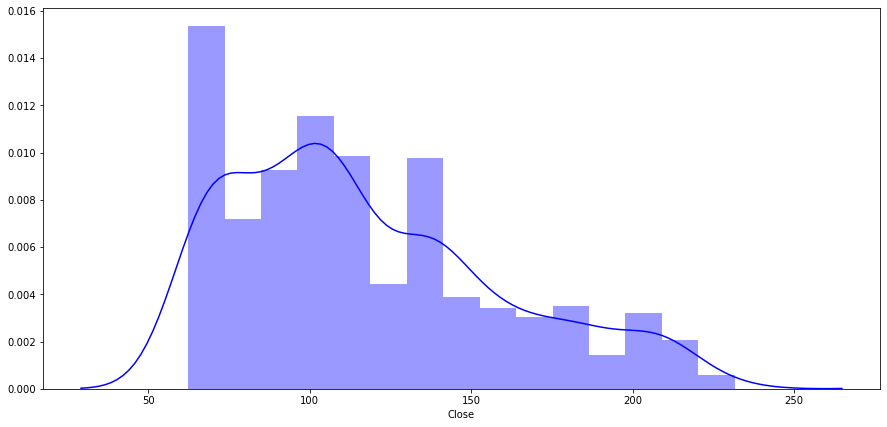

In [58]:
# Plot distribution of the average price
plt.figure(figsize = (15,7))
sns.distplot(df['Close'],color = 'b')

In [59]:
df_prophet =df[['Date','Close']]

In [63]:
df_prophet = df_prophet.rename(columns = {'Date': 'ds','Close':'y'})

In [64]:
df_prophet

,ds,y
20,01-02-2017,63.580002
272,01-02-2018,94.260002
523,01-02-2019,102.779999
39,01-03-2017,64.940002
291,01-03-2018,92.849998
...,...,...
209,31-10-2017,83.180000
461,31-10-2018,106.809998
712,31-10-2019,143.369995
501,31-12-2018,101.570000


In [65]:
model =Prophet()
model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [75]:
future = model.make_future_dataframe(periods = 365)
forcast = model.predict(future)

In [76]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-02,58.055844,53.701263,82.853336,58.055844,58.055844,10.289794,10.289794,10.289794,0.572723,0.572723,0.572723,9.717071,9.717071,9.717071,0.0,0.0,0.0,68.345638
1,2017-01-03,58.133009,53.087549,83.877042,58.133009,58.133009,10.289207,10.289207,10.289207,0.234876,0.234876,0.234876,10.054331,10.054331,10.054331,0.0,0.0,0.0,68.422216
2,2017-01-05,58.287339,54.743029,84.099791,58.287339,58.287339,10.746437,10.746437,10.746437,0.395392,0.395392,0.395392,10.351045,10.351045,10.351045,0.0,0.0,0.0,69.033777
3,2017-01-06,58.364504,56.028283,83.657596,58.364504,58.364504,10.809910,10.809910,10.809910,0.489438,0.489438,0.489438,10.320471,10.320471,10.320471,0.0,0.0,0.0,69.174414
4,2017-01-08,58.518834,54.569750,83.424607,58.518834,58.518834,10.239212,10.239212,10.239212,0.297737,0.297737,0.297737,9.941475,9.941475,9.941475,0.0,0.0,0.0,68.758046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,2021-12-04,272.553107,242.915350,272.423435,269.149487,275.704660,-14.676908,-14.676908,-14.676908,-2.323781,-2.323781,-2.323781,-12.353126,-12.353126,-12.353126,0.0,0.0,0.0,257.876199
1296,2021-12-05,272.716868,245.319868,276.194305,269.300882,275.885546,-12.447903,-12.447903,-12.447903,0.297737,0.297737,0.297737,-12.745641,-12.745641,-12.745641,0.0,0.0,0.0,260.268965
1297,2021-12-06,272.880630,246.580062,275.432198,269.452276,276.059740,-12.465608,-12.465608,-12.465608,0.572723,0.572723,0.572723,-13.038331,-13.038331,-13.038331,0.0,0.0,0.0,260.415022
1298,2021-12-07,273.044391,245.285624,274.595530,269.603671,276.233935,-12.984434,-12.984434,-12.984434,0.234876,0.234876,0.234876,-13.219311,-13.219311,-13.219311,0.0,0.0,0.0,260.059957


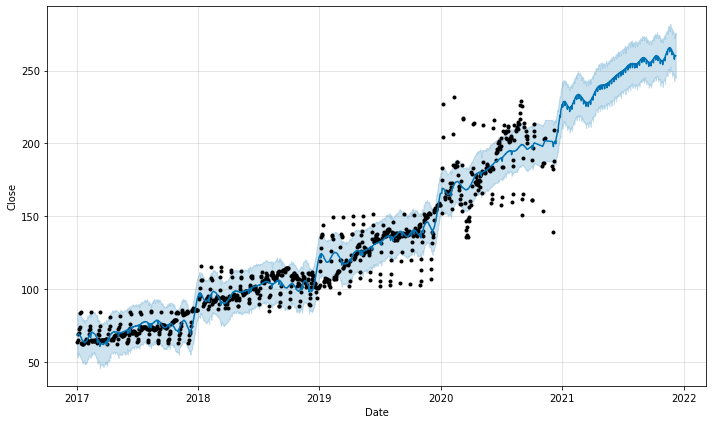

In [77]:
fig1= model.plot(forcast, xlabel='Date' , ylabel ='Close')

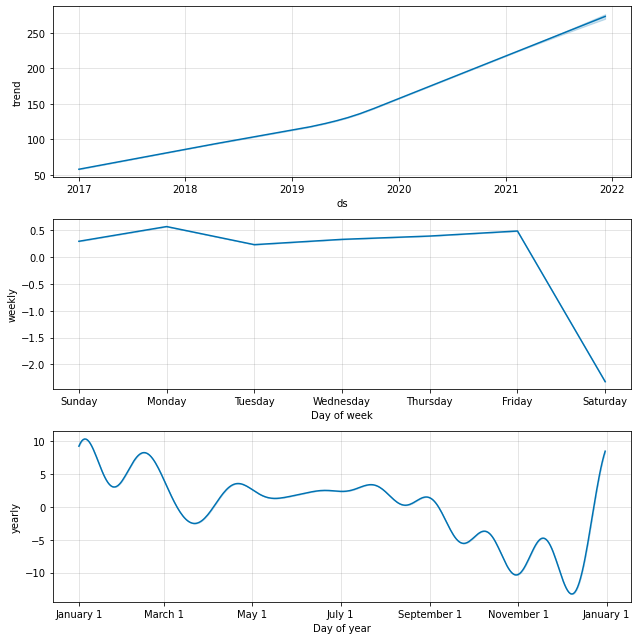

In [79]:
fig2 = model.plot_components(forcast)